In [3]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# necessary libraries
!pip install ultralytics
!pip install opencv-python-headless
!pip install google-auth google-auth-oauthlib google-auth-httplib2


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# link of the google drive folder in case you want to download it
# import gdown

# url = 'https://drive.google.com/drive/folders/1cBGd1Rp4ZNEO-tpvIZBQ_8HNjtU3SKIU?usp=sharing'
# gdown.download_folder(url, output='/content/dataset', quiet=False)


In [4]:
import zipfile
import os

# path to zip file
zip_file_path = '/content/drive/MyDrive/bookdata.zip'

# directory to extract to
extraction_path = '/content/datasets'

# create extraction directory if not exists
os.makedirs(extraction_path, exist_ok=True)

# unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)


In [5]:
import torch
torch.cuda.empty_cache()
from ultralytics import YOLO

# path to the dataset
data_path = extraction_path
yaml_path = f'{data_path}/buku/data.yaml'


# initialize and train the model with the modified configuration
model = YOLO("yolov8n.pt")

# combine the dictionary with the path to the data
results = model.train(data=yaml_path, epochs=60, imgsz=640)


Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/buku/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/datasets/buku/train/labels.cache... 1131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1131/1131 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/buku/valid/labels.cache... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      2.59G     0.9969      1.719      1.469         34        640: 100%|██████████| 71/71 [00:31<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        202        267      0.352      0.397      0.318      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      2.27G      1.092      1.383      1.552         40        640: 100%|██████████| 71/71 [00:28<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        202        267     0.0795       0.18     0.0418     0.0216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      2.25G      1.145       1.29      1.582         45        640: 100%|██████████| 71/71 [00:25<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]


                   all        202        267      0.736      0.517       0.52      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      2.29G      1.145      1.248      1.599         47        640: 100%|██████████| 71/71 [00:28<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]


                   all        202        267      0.434      0.494      0.436      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      2.27G      1.104      1.178      1.571         45        640: 100%|██████████| 71/71 [00:24<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]

                   all        202        267       0.68      0.551      0.523      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      2.28G      1.086      1.104      1.561         21        640: 100%|██████████| 71/71 [00:28<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]

                   all        202        267      0.526      0.483      0.464       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      2.29G      1.053      1.074      1.521         26        640: 100%|██████████| 71/71 [00:25<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        202        267      0.432      0.577      0.402      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      2.27G      1.047      1.022      1.493         52        640: 100%|██████████| 71/71 [00:29<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        202        267      0.676      0.633      0.649      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      2.27G      1.013     0.9865      1.462         49        640: 100%|██████████| 71/71 [00:25<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        202        267      0.692      0.603      0.592       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      2.26G     0.9653     0.9321      1.436         52        640: 100%|██████████| 71/71 [00:25<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        202        267      0.762      0.682      0.709      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      2.25G     0.9564     0.8728      1.426         30        640: 100%|██████████| 71/71 [00:27<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        202        267      0.702      0.659      0.667       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      2.29G      0.928     0.8912      1.414         33        640: 100%|██████████| 71/71 [00:24<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all        202        267      0.691      0.678      0.677       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      2.27G     0.9395     0.8836      1.417         42        640: 100%|██████████| 71/71 [00:27<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]


                   all        202        267      0.809      0.682      0.756       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      2.26G     0.9182     0.8372      1.392         29        640: 100%|██████████| 71/71 [00:25<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]

                   all        202        267      0.767      0.588      0.697      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      2.25G     0.9005     0.8083      1.379         31        640: 100%|██████████| 71/71 [00:30<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        202        267      0.757      0.712      0.771      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      2.29G     0.8759     0.7692      1.367         55        640: 100%|██████████| 71/71 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        202        267       0.72      0.787      0.791      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      2.25G     0.9087     0.7984      1.386         43        640: 100%|██████████| 71/71 [00:26<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        202        267      0.743        0.7      0.763      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      2.24G     0.8739     0.7868      1.374         32        640: 100%|██████████| 71/71 [00:25<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        202        267      0.747      0.727      0.763      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      2.27G     0.8415     0.7204      1.335         36        640: 100%|██████████| 71/71 [00:25<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]

                   all        202        267      0.708      0.719       0.75      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      2.29G     0.8535     0.7447      1.347         26        640: 100%|██████████| 71/71 [00:26<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        202        267      0.735      0.682      0.708      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      2.27G     0.8612     0.7262      1.355         32        640: 100%|██████████| 71/71 [00:25<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]

                   all        202        267      0.762      0.753      0.773      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      2.26G     0.8104     0.7059      1.309         39        640: 100%|██████████| 71/71 [00:26<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        202        267       0.81      0.689      0.776      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      2.27G     0.8029     0.6875      1.295         35        640: 100%|██████████| 71/71 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        202        267      0.759      0.727      0.738      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      2.27G     0.8219     0.6831      1.312         46        640: 100%|██████████| 71/71 [00:28<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        202        267      0.748      0.743      0.797      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      2.25G     0.7786     0.6705       1.29         40        640: 100%|██████████| 71/71 [00:25<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]

                   all        202        267      0.752        0.7      0.729       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      2.26G     0.8246      0.666      1.308         31        640: 100%|██████████| 71/71 [00:26<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        202        267      0.789       0.76      0.814      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      2.16G     0.7969     0.6471       1.28         39        640: 100%|██████████| 71/71 [00:24<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        202        267      0.795      0.756      0.832      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      2.25G     0.7727     0.6258      1.282         48        640: 100%|██████████| 71/71 [00:26<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        202        267      0.823      0.715      0.794      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      2.25G      0.772     0.6564      1.266         29        640: 100%|██████████| 71/71 [00:24<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]

                   all        202        267      0.726      0.764      0.773      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      2.26G     0.7661     0.6233      1.273         34        640: 100%|██████████| 71/71 [00:27<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        202        267      0.772       0.81      0.806       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      2.25G     0.7458     0.6058      1.267         43        640: 100%|██████████| 71/71 [00:24<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]

                   all        202        267      0.774      0.787      0.825       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      2.27G     0.7246     0.5937      1.245         44        640: 100%|██████████| 71/71 [00:28<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        202        267      0.772      0.745      0.765       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      2.25G     0.7315      0.591       1.24         29        640: 100%|██████████| 71/71 [00:28<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        202        267      0.763      0.801      0.808      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      2.26G     0.7354       0.58       1.25         33        640: 100%|██████████| 71/71 [00:26<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]

                   all        202        267      0.806      0.779      0.805      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      2.27G     0.7311     0.5822      1.237         29        640: 100%|██████████| 71/71 [00:25<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        202        267        0.8      0.787      0.818       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      2.25G     0.7156     0.5661      1.231         33        640: 100%|██████████| 71/71 [00:25<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        202        267      0.791      0.719      0.756      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      2.25G     0.7018     0.5578      1.228         37        640: 100%|██████████| 71/71 [00:26<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        202        267      0.813      0.787       0.84      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      2.26G     0.7006     0.5433      1.233         51        640: 100%|██████████| 71/71 [00:24<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]

                   all        202        267      0.792      0.785       0.82      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      2.17G     0.7023     0.5477      1.217         57        640: 100%|██████████| 71/71 [00:27<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        202        267      0.815      0.776      0.836      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      2.26G     0.6829     0.5285      1.201         30        640: 100%|██████████| 71/71 [00:25<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]

                   all        202        267      0.833      0.753      0.799      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      2.27G     0.6805     0.5286      1.206         33        640: 100%|██████████| 71/71 [00:31<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        202        267        0.8      0.794      0.825      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      2.26G     0.6622     0.5033        1.2         30        640: 100%|██████████| 71/71 [00:25<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        202        267      0.798      0.805      0.845      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      2.25G      0.669     0.5201      1.189         36        640: 100%|██████████| 71/71 [00:27<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.84it/s]

                   all        202        267      0.813      0.787      0.825      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      2.25G     0.6535     0.5152      1.193         26        640: 100%|██████████| 71/71 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        202        267      0.816      0.783       0.82      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      2.27G      0.669      0.513      1.201         37        640: 100%|██████████| 71/71 [00:26<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]

                   all        202        267      0.844      0.768       0.81       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      2.16G      0.652     0.5002      1.184         41        640: 100%|██████████| 71/71 [00:25<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        202        267      0.824      0.787      0.825      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      2.25G     0.6356     0.4813       1.18         38        640: 100%|██████████| 71/71 [00:26<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]

                   all        202        267      0.848      0.793      0.824      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      2.25G     0.6322     0.4853      1.169         37        640: 100%|██████████| 71/71 [00:26<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        202        267      0.805       0.82      0.824       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60       2.3G     0.6341     0.4719      1.176         34        640: 100%|██████████| 71/71 [00:29<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]

                   all        202        267      0.825      0.794      0.822      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      2.24G     0.6059     0.4634      1.169         42        640: 100%|██████████| 71/71 [00:27<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        202        267       0.83      0.807      0.823      0.638


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      2.39G     0.5689     0.4428      1.225         12        640: 100%|██████████| 71/71 [00:24<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.73it/s]

                   all        202        267      0.804      0.813      0.846      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      2.25G     0.5523     0.3853      1.196         15        640: 100%|██████████| 71/71 [00:26<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]

                   all        202        267      0.826      0.794      0.833      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      2.25G     0.5279     0.3601      1.185         12        640: 100%|██████████| 71/71 [00:23<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]

                   all        202        267      0.822      0.812      0.826      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      2.24G     0.5226     0.3614      1.173         30        640: 100%|██████████| 71/71 [00:26<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        202        267      0.857      0.798      0.853      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      2.25G     0.4977     0.3385      1.137         12        640: 100%|██████████| 71/71 [00:23<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        202        267       0.83      0.787      0.831      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      2.25G     0.5065     0.3413      1.165         15        640: 100%|██████████| 71/71 [00:25<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        202        267      0.825      0.809      0.851      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      2.25G     0.4939     0.3304      1.149         12        640: 100%|██████████| 71/71 [00:27<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]

                   all        202        267      0.821      0.805      0.844      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      2.24G     0.4801     0.3186      1.135         17        640: 100%|██████████| 71/71 [00:26<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        202        267       0.82      0.813      0.855      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      2.25G     0.4706     0.3086      1.122         16        640: 100%|██████████| 71/71 [00:23<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]

                   all        202        267      0.857      0.787       0.86      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      2.25G     0.4644     0.3157      1.129         14        640: 100%|██████████| 71/71 [00:25<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        202        267      0.829      0.815      0.861      0.682



60 epochs completed in 0.514 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]


                   all        202        267      0.829      0.815       0.86      0.684
Speed: 0.3ms preprocess, 3.2ms inference, 0.0ms loss, 7.0ms postprocess per image
Results saved to runs/detect/train2


In [6]:
import cv2
import numpy as np
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode

# path to the trained model
trained_model_path = '/content/runs/detect/train2/weights/best.pt' # it should be set to the last train values, the default
                                                                  # is 'train', but because I ran it 2 times it is set to 'train2'
                                                                  # should open the runs/detect directory and set it to last folder name in it.

# load the trained model
model = YOLO(trained_model_path)

def js_to_image(js_reply):
    """
    Convert image from JavaScript as Base64 to OpenCV image
    """
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img

def bbox_to_bytes(bbox_array):
    """
    Convert bounding box image to bytes
    """
    bbox_PIL = Image.fromarray(bbox_array, 'RGB')
    iobuf = io.BytesIO()
    bbox_PIL.save(iobuf, format='jpeg')
    bbox_bytes = 'data:image/jpeg;base64,' + b64encode(iobuf.getvalue()).decode('utf-8')
    return bbox_bytes


<IPython.core.display.Javascript object>


0: 480x640 (no detections), 13.5ms
Speed: 3.2ms preprocess, 13.5ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


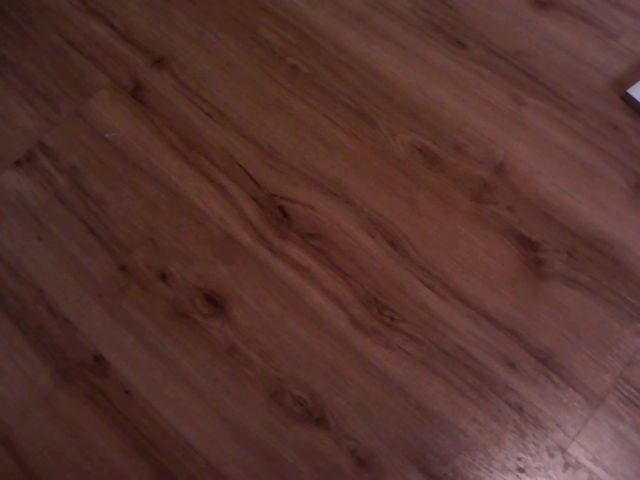


0: 480x640 1 buku, 7.6ms
Speed: 1.8ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


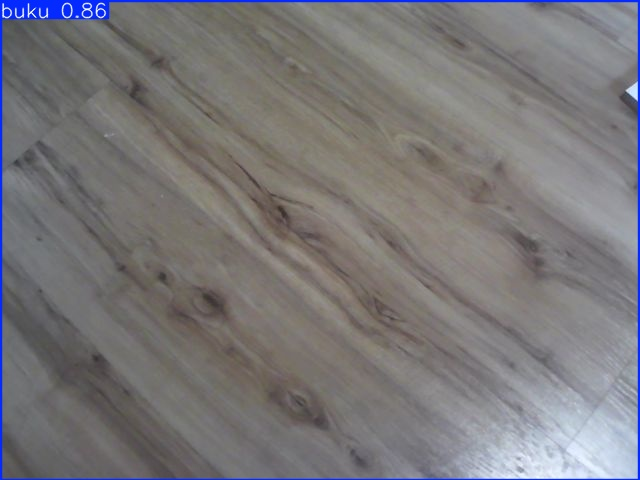


0: 480x640 2 bukus, 13.2ms
Speed: 1.7ms preprocess, 13.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


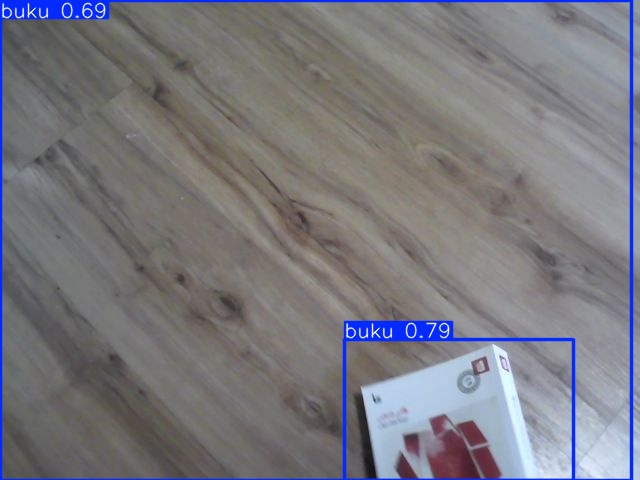


0: 480x640 1 buku, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)


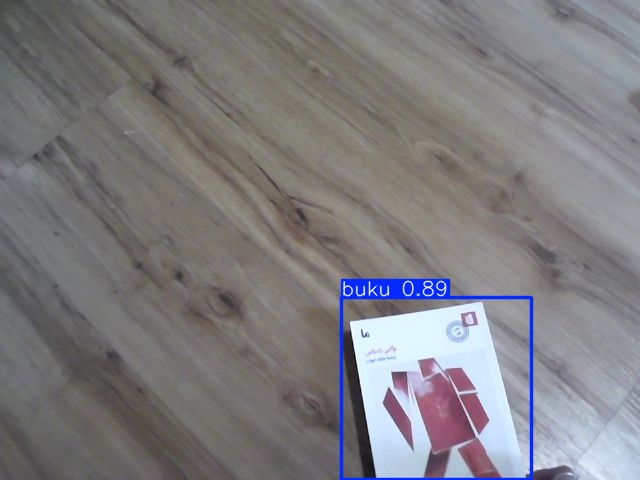


0: 480x640 2 bukus, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


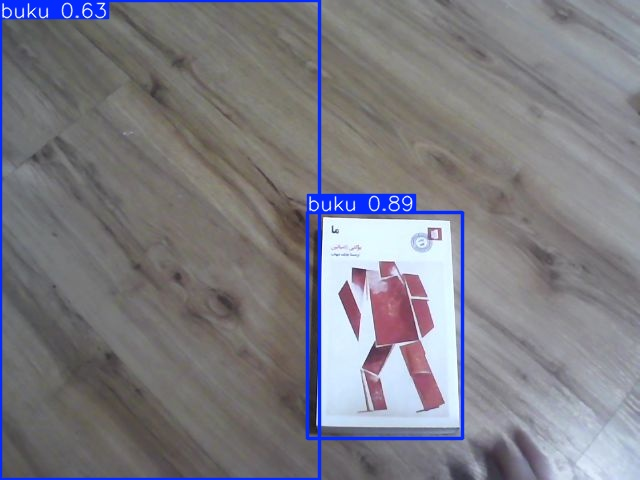


0: 480x640 2 bukus, 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


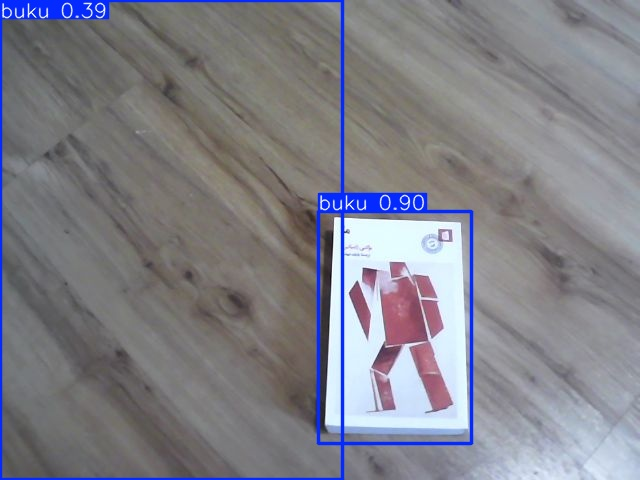


0: 480x640 2 bukus, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


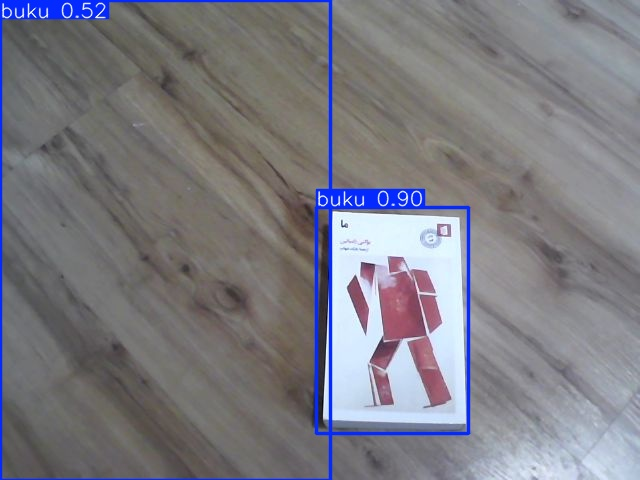


0: 480x640 2 bukus, 9.8ms
Speed: 1.6ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


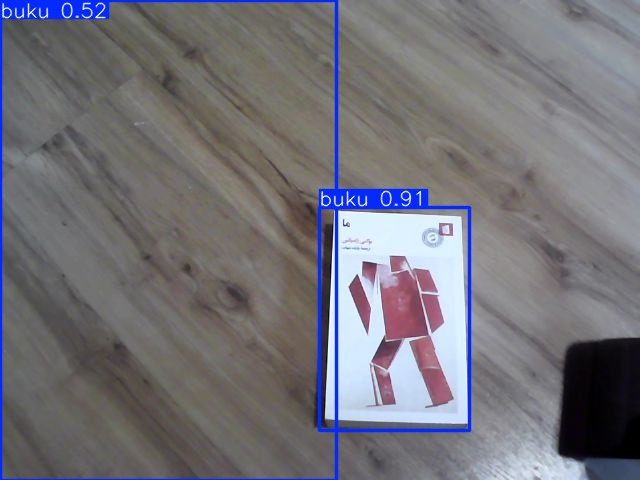


0: 480x640 2 bukus, 9.6ms
Speed: 1.6ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


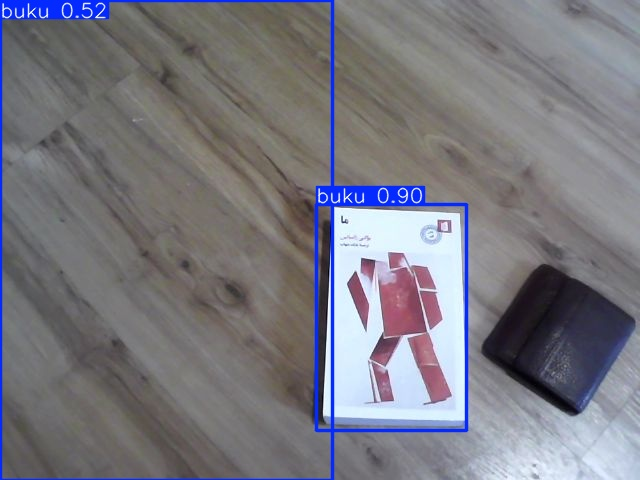


0: 480x640 2 bukus, 11.0ms
Speed: 1.7ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


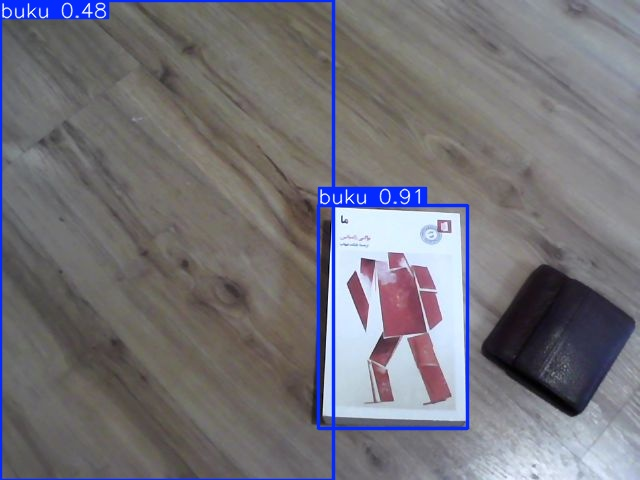


0: 480x640 1 buku, 9.4ms
Speed: 1.6ms preprocess, 9.4ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


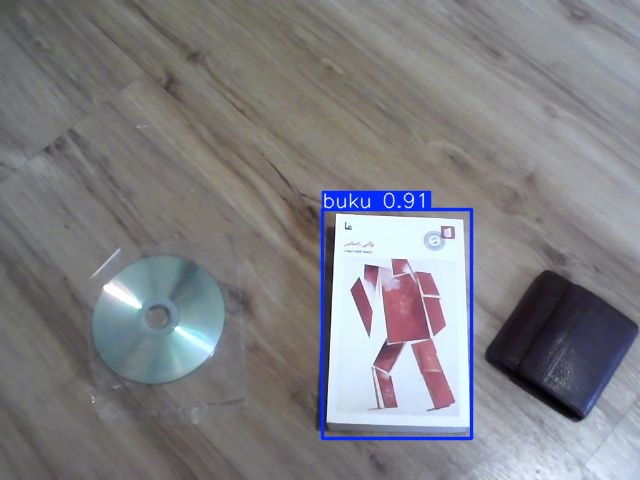


0: 480x640 1 buku, 15.6ms
Speed: 3.7ms preprocess, 15.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


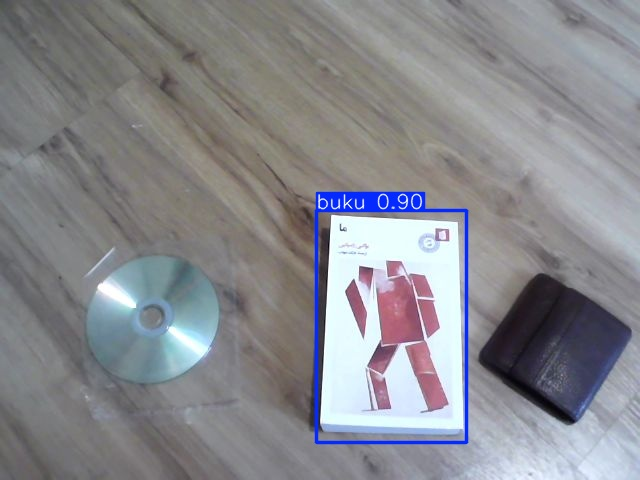


0: 480x640 1 buku, 10.5ms
Speed: 1.7ms preprocess, 10.5ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


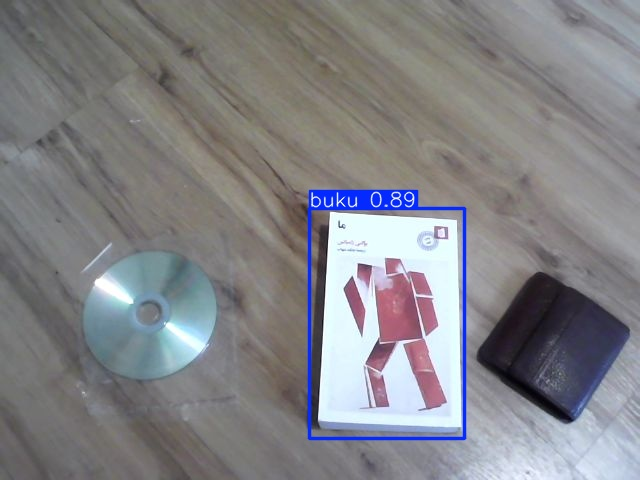


0: 480x640 1 buku, 10.7ms
Speed: 1.6ms preprocess, 10.7ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


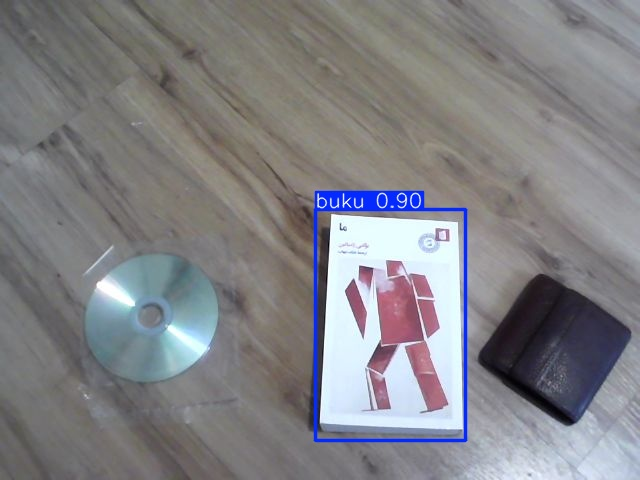


0: 480x640 2 bukus, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


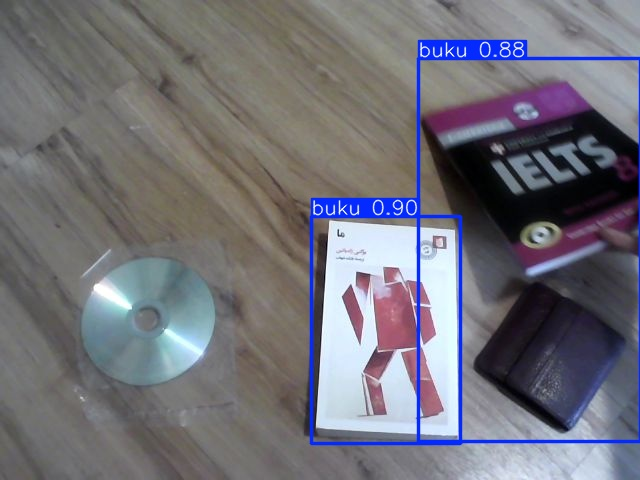


0: 480x640 2 bukus, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


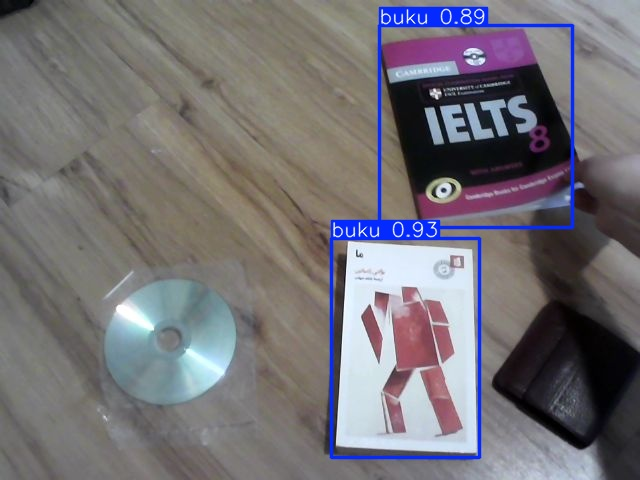


0: 480x640 4 bukus, 9.4ms
Speed: 1.6ms preprocess, 9.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


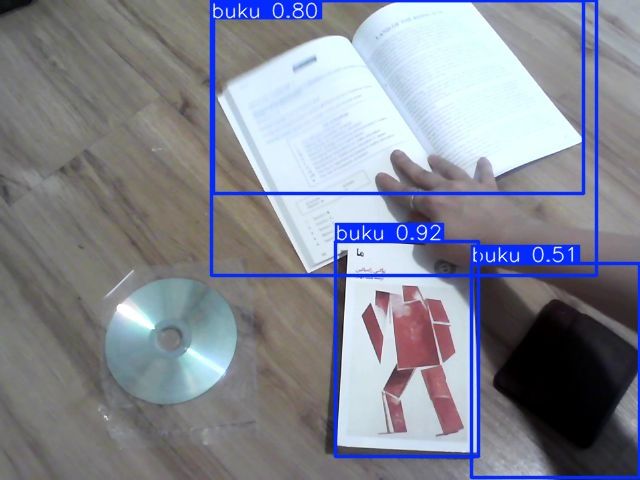


0: 480x640 2 bukus, 9.7ms
Speed: 1.6ms preprocess, 9.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


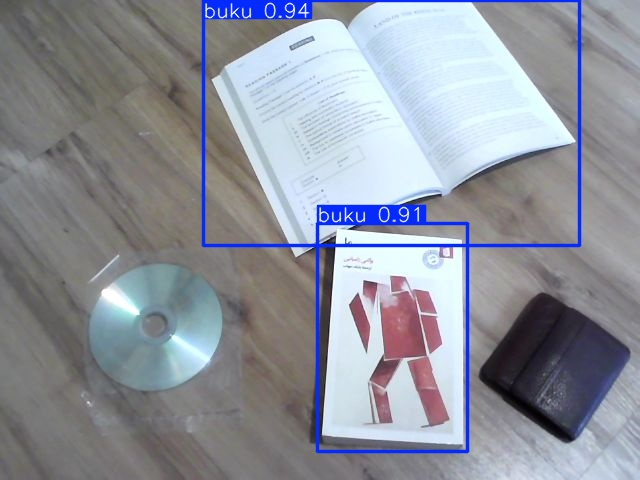


0: 480x640 2 bukus, 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


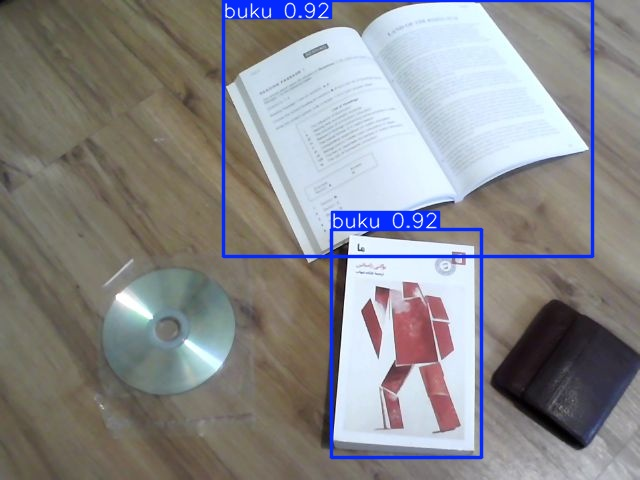


0: 480x640 2 bukus, 16.4ms
Speed: 3.8ms preprocess, 16.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


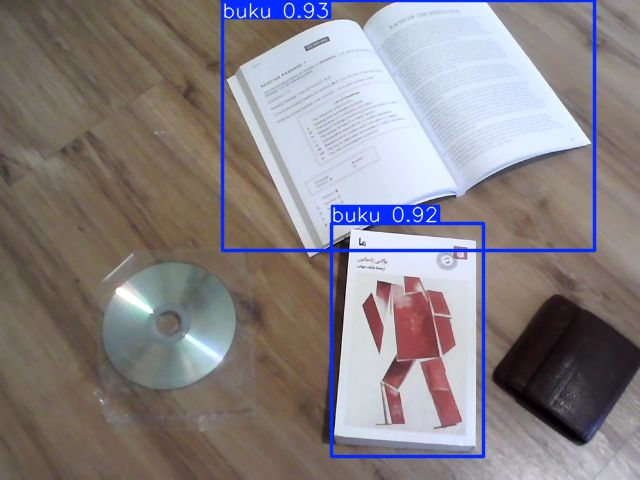


0: 480x640 2 bukus, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


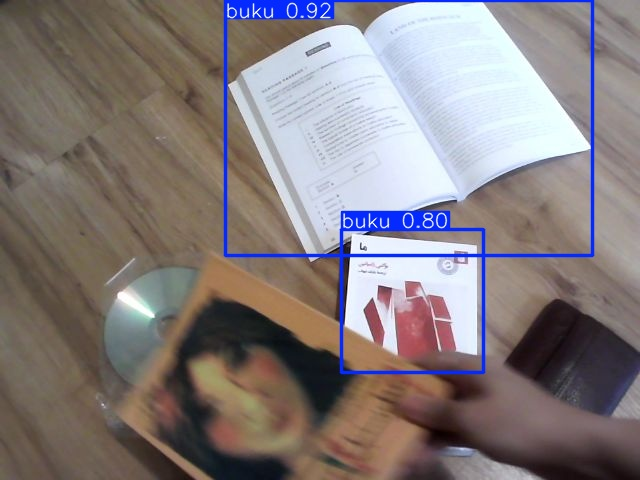


0: 480x640 3 bukus, 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


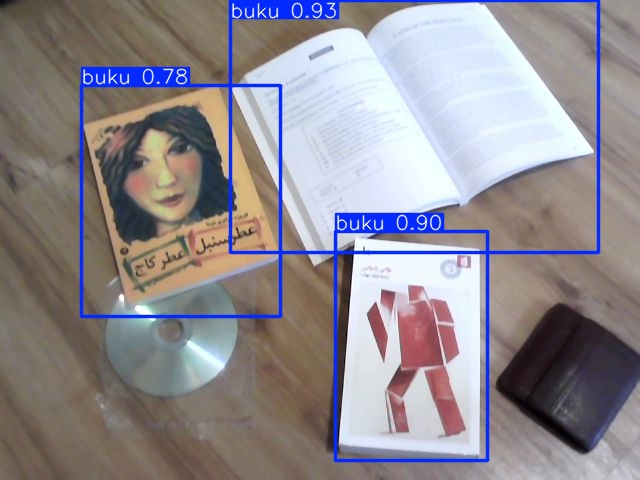


0: 480x640 3 bukus, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


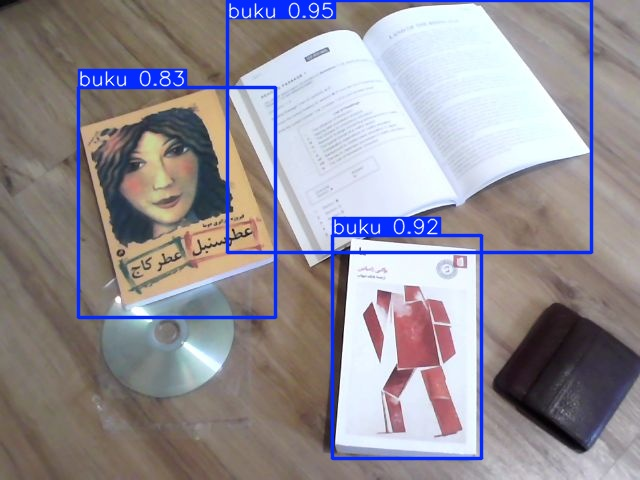


0: 480x640 3 bukus, 9.6ms
Speed: 1.6ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


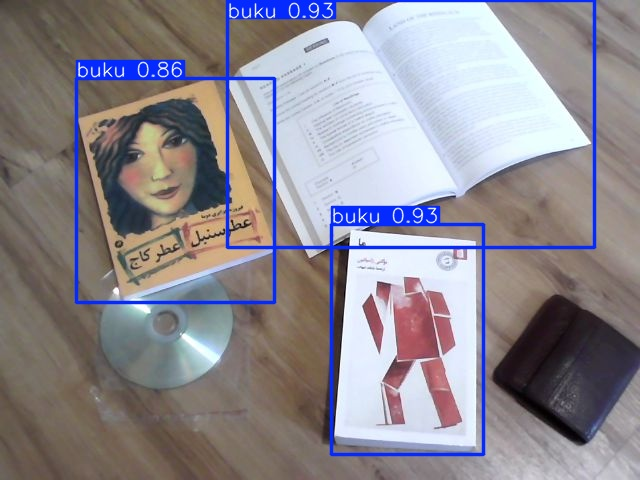


0: 480x640 3 bukus, 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


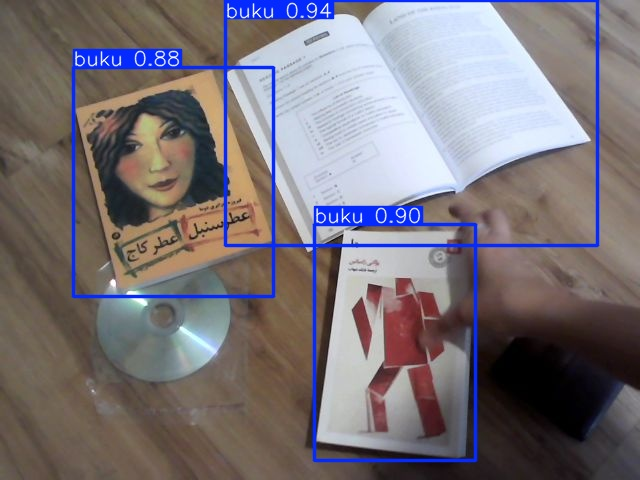


0: 480x640 2 bukus, 10.0ms
Speed: 1.6ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


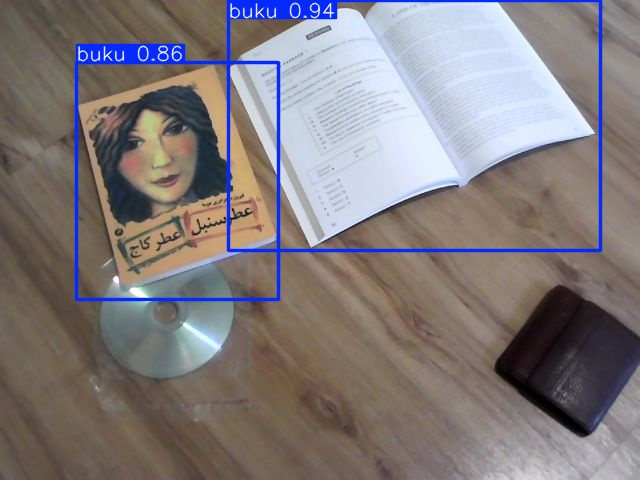


0: 480x640 2 bukus, 14.2ms
Speed: 3.6ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


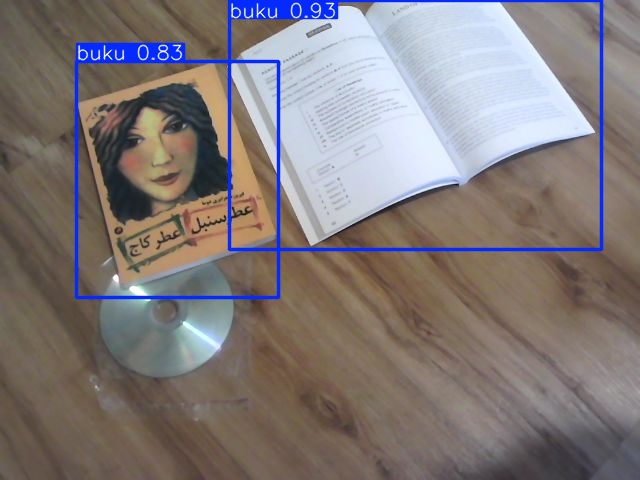


0: 480x640 2 bukus, 15.0ms
Speed: 3.7ms preprocess, 15.0ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


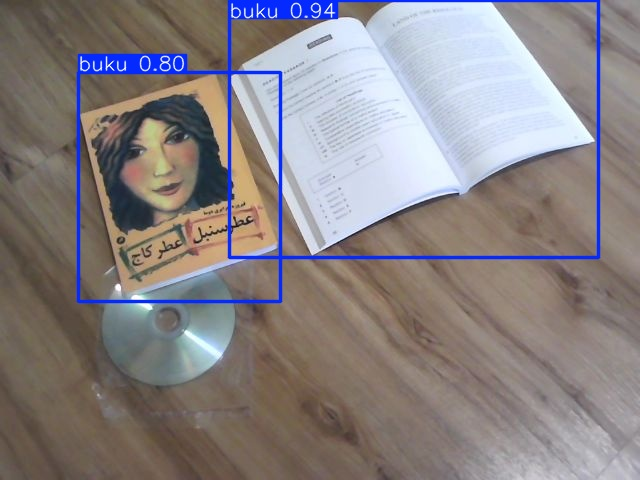


0: 480x640 2 bukus, 9.6ms
Speed: 2.2ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


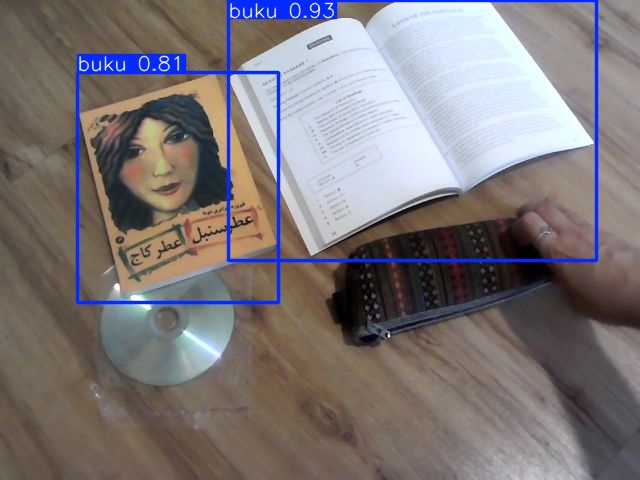


0: 480x640 2 bukus, 12.2ms
Speed: 2.7ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


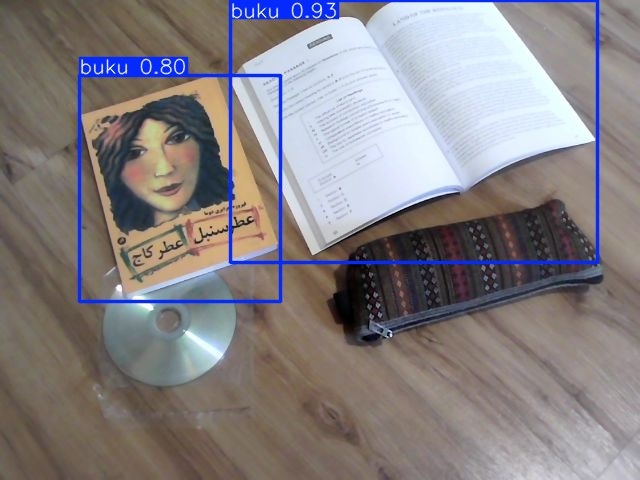


0: 480x640 3 bukus, 10.6ms
Speed: 1.6ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


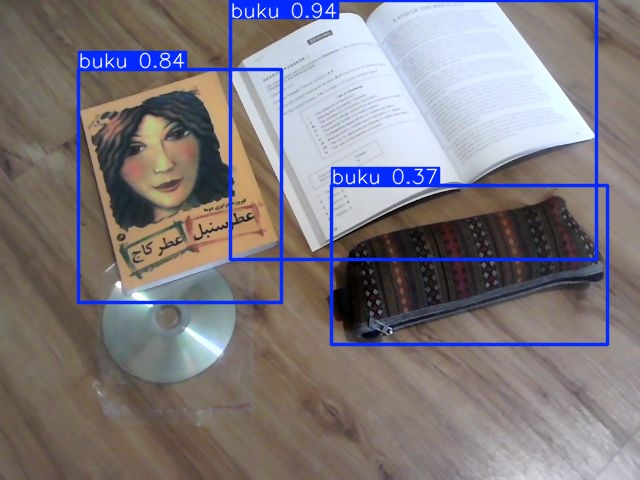


0: 480x640 4 bukus, 12.3ms
Speed: 1.6ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


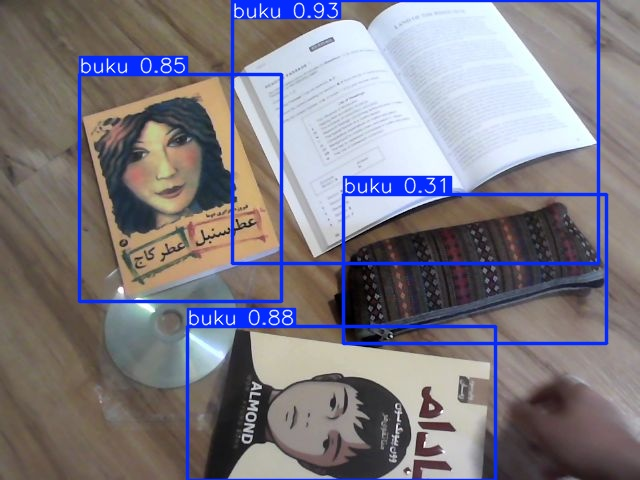


0: 480x640 4 bukus, 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


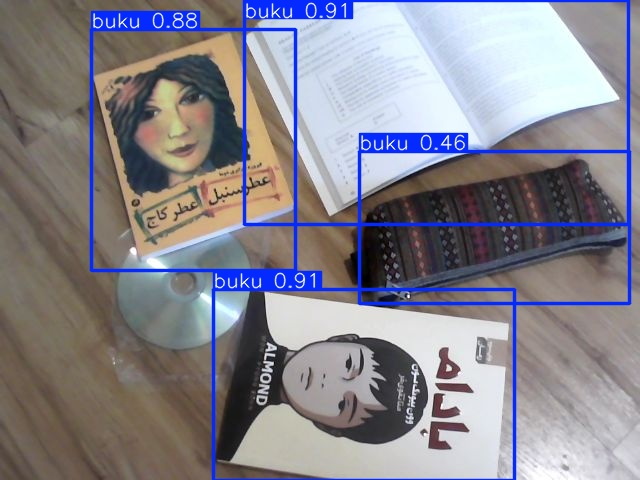


0: 480x640 4 bukus, 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


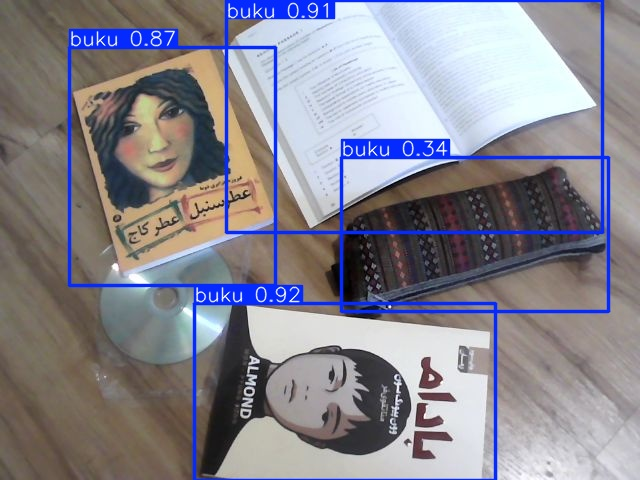


0: 480x640 2 bukus, 15.6ms
Speed: 1.6ms preprocess, 15.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


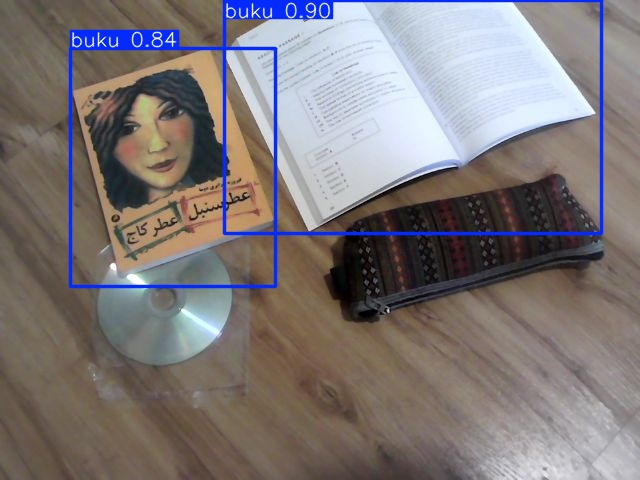


0: 480x640 2 bukus, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


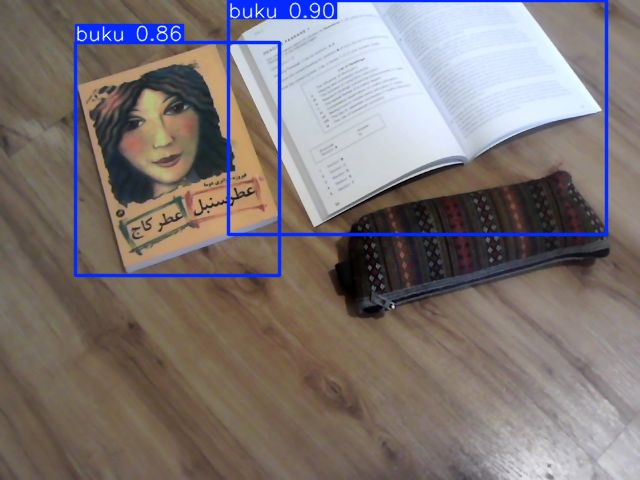


0: 480x640 2 bukus, 9.7ms
Speed: 1.5ms preprocess, 9.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


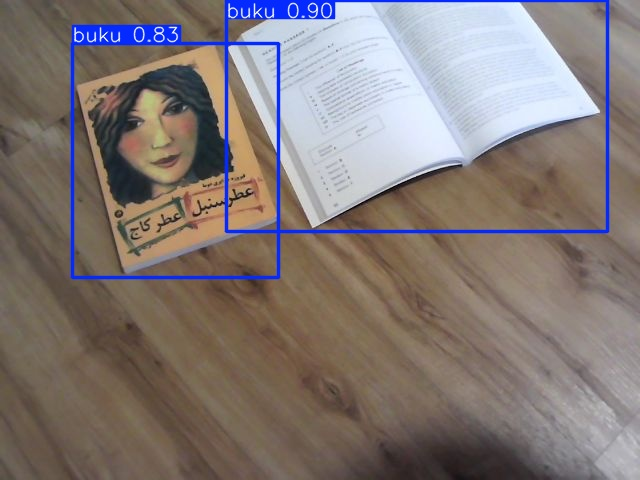


0: 480x640 1 buku, 10.2ms
Speed: 1.5ms preprocess, 10.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


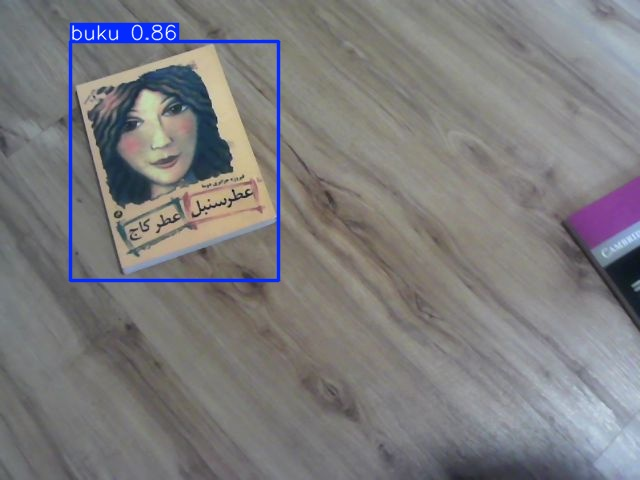


0: 480x640 1 buku, 10.6ms
Speed: 2.4ms preprocess, 10.6ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


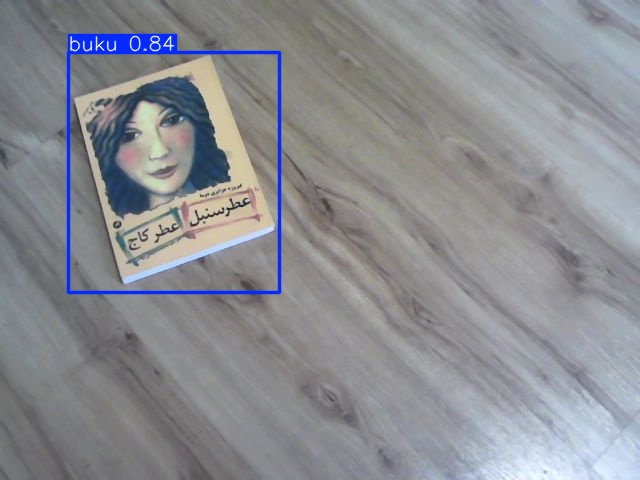


0: 480x640 1 buku, 9.8ms
Speed: 1.6ms preprocess, 9.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


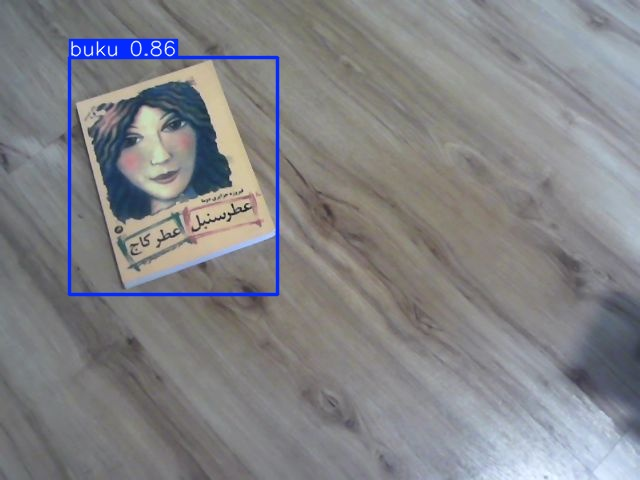


0: 480x640 1 buku, 12.7ms
Speed: 1.6ms preprocess, 12.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


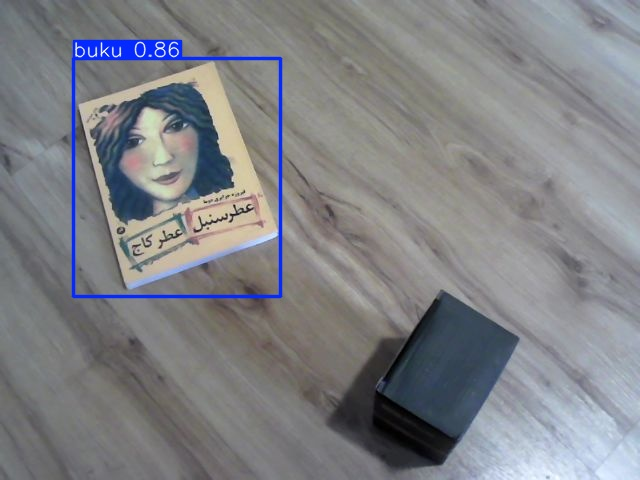


0: 480x640 1 buku, 10.2ms
Speed: 1.6ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


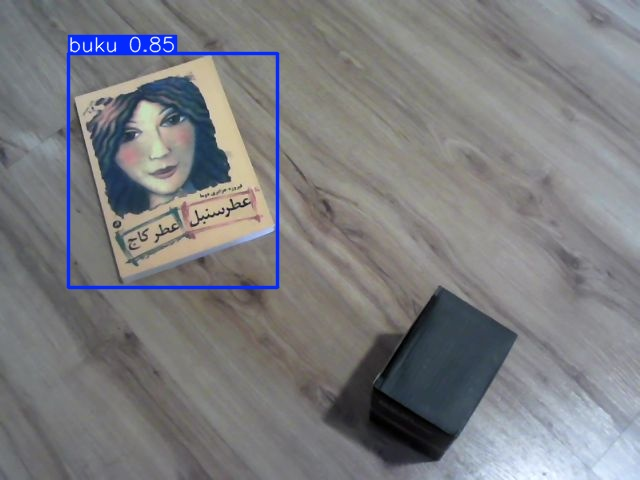


0: 480x640 1 buku, 13.6ms
Speed: 1.6ms preprocess, 13.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


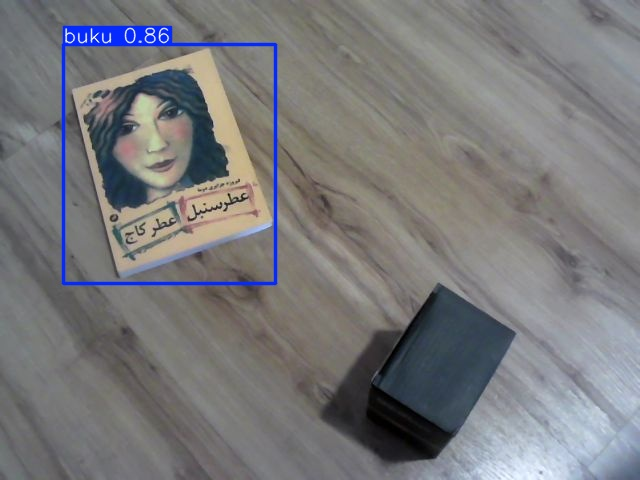


0: 480x640 1 buku, 15.8ms
Speed: 1.6ms preprocess, 15.8ms inference, 5.7ms postprocess per image at shape (1, 3, 480, 640)


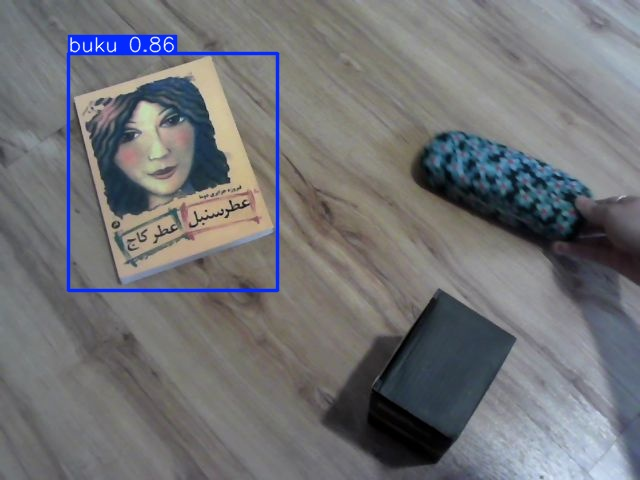


0: 480x640 1 buku, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


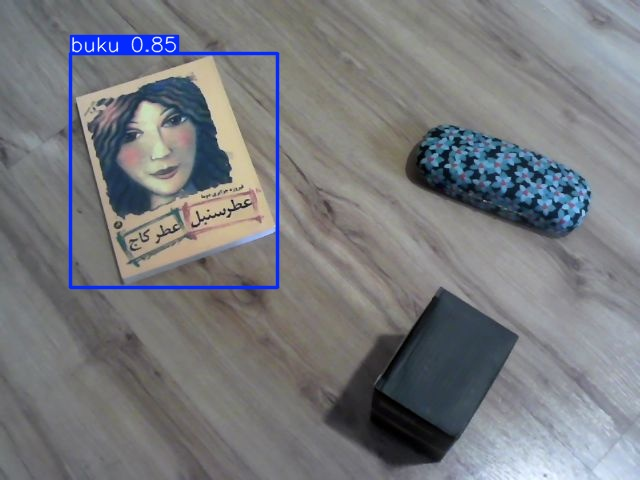


0: 480x640 1 buku, 10.8ms
Speed: 1.7ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


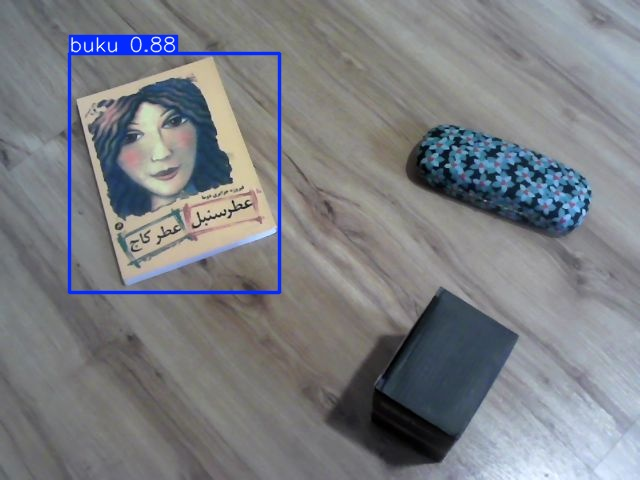


0: 480x640 1 buku, 10.4ms
Speed: 1.6ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


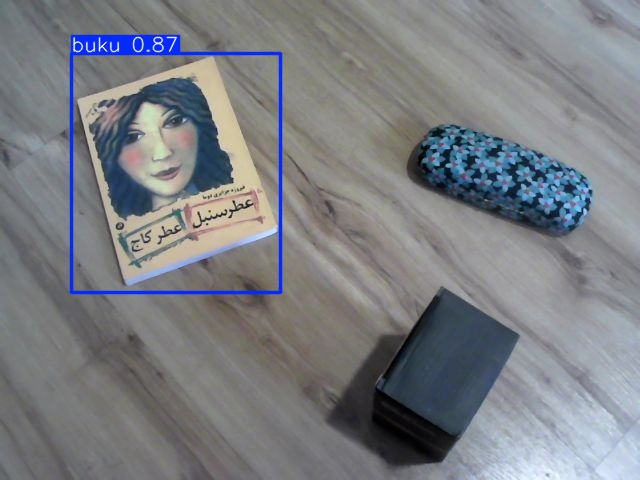


0: 480x640 1 buku, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


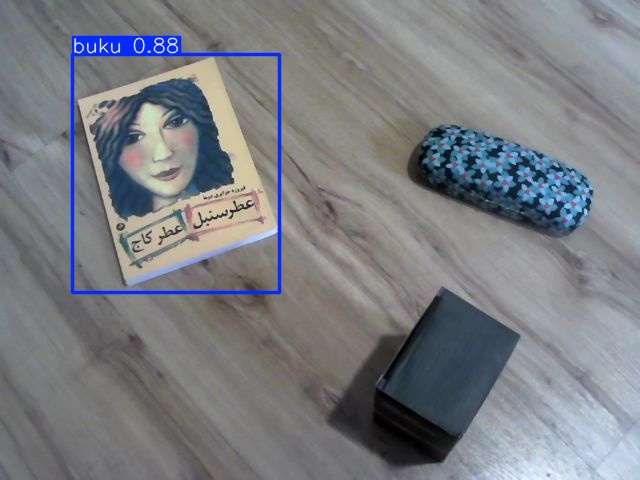


0: 480x640 2 bukus, 9.8ms
Speed: 1.6ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


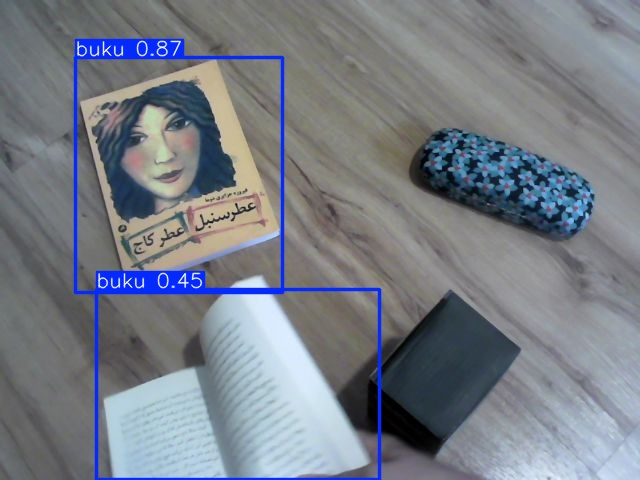


0: 480x640 2 bukus, 10.7ms
Speed: 3.1ms preprocess, 10.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


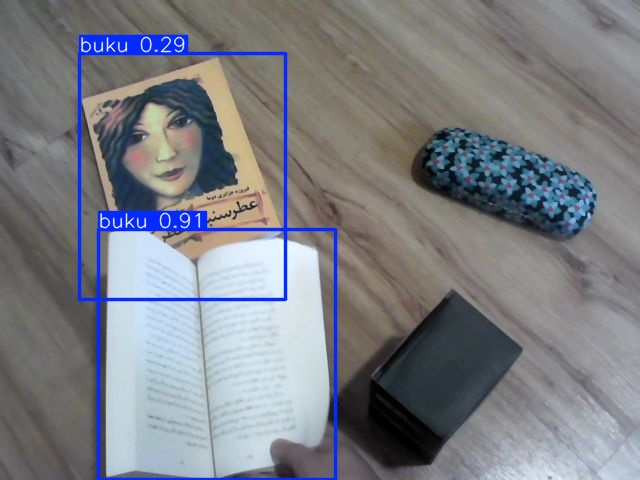


0: 480x640 2 bukus, 15.5ms
Speed: 1.6ms preprocess, 15.5ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


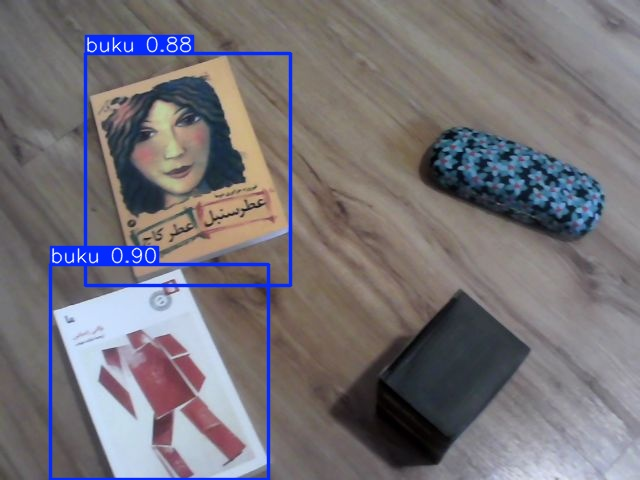


0: 480x640 2 bukus, 9.7ms
Speed: 1.6ms preprocess, 9.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


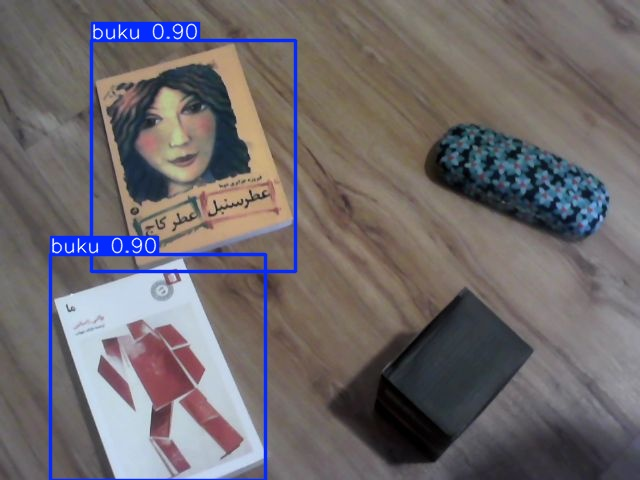


0: 480x640 2 bukus, 11.0ms
Speed: 1.6ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


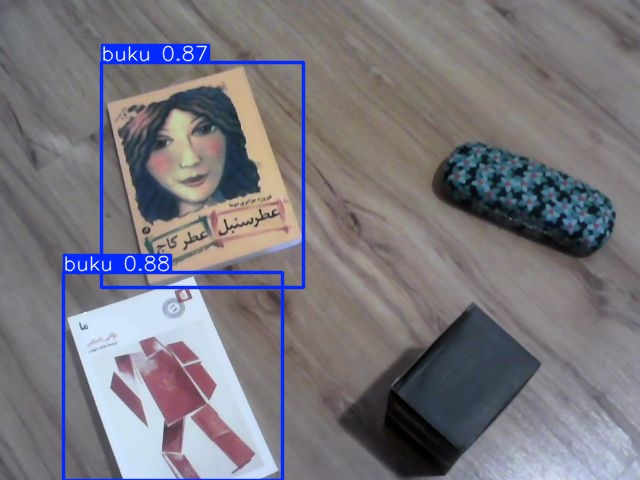


0: 480x640 3 bukus, 11.1ms
Speed: 1.7ms preprocess, 11.1ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


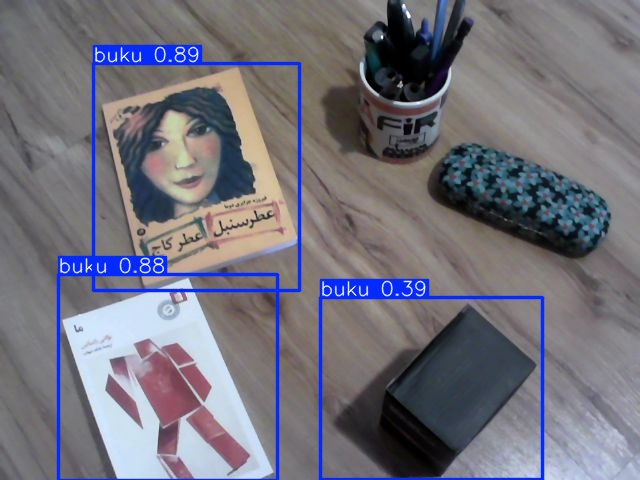


0: 480x640 2 bukus, 10.4ms
Speed: 1.6ms preprocess, 10.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


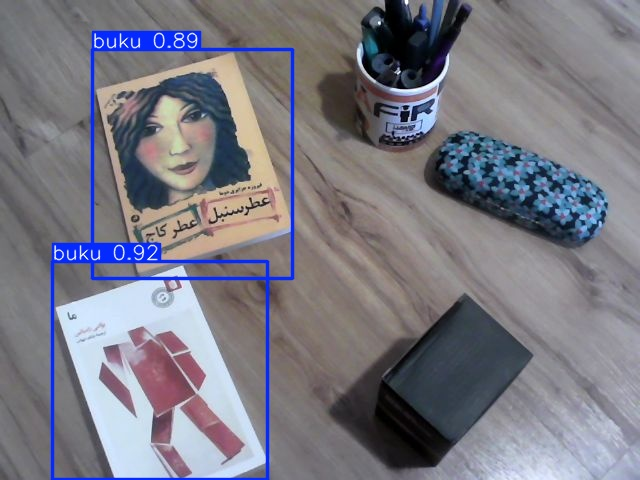


0: 480x640 3 bukus, 10.0ms
Speed: 1.6ms preprocess, 10.0ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


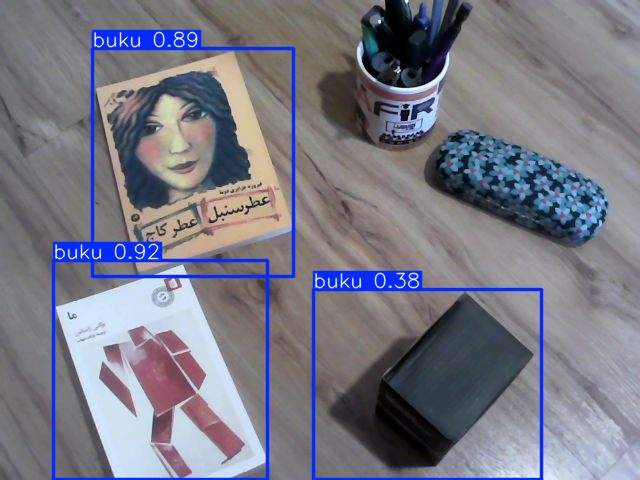


0: 480x640 3 bukus, 9.8ms
Speed: 1.6ms preprocess, 9.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


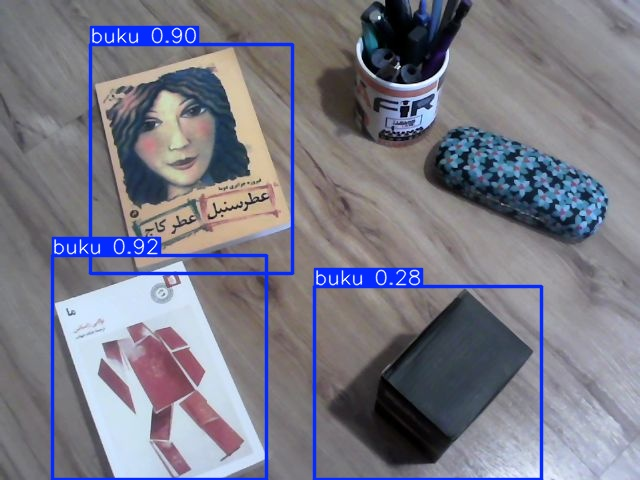


0: 480x640 2 bukus, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


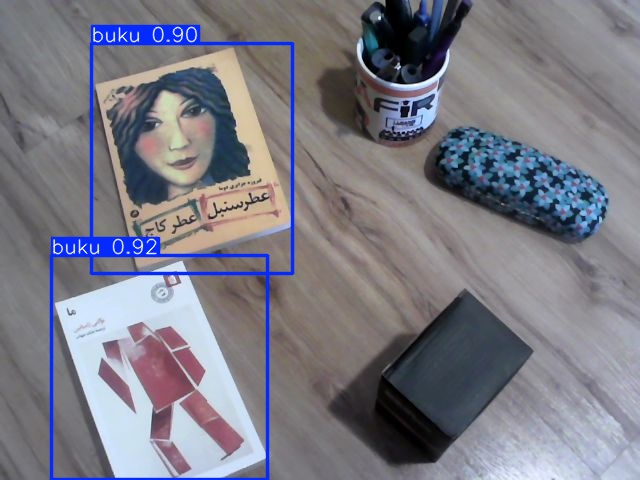


0: 480x640 2 bukus, 14.4ms
Speed: 1.7ms preprocess, 14.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


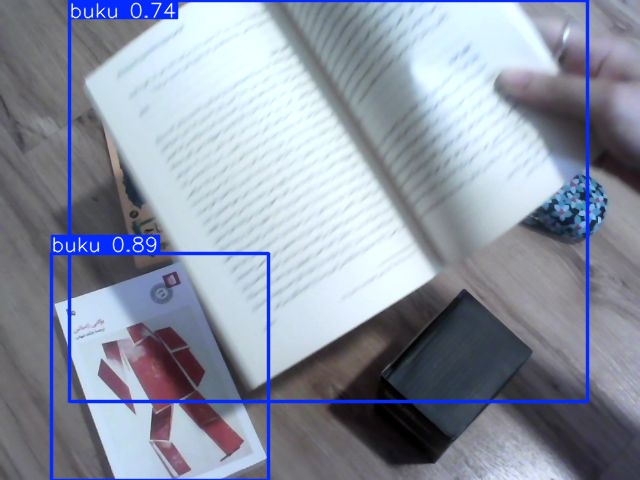


0: 480x640 1 buku, 9.4ms
Speed: 1.6ms preprocess, 9.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


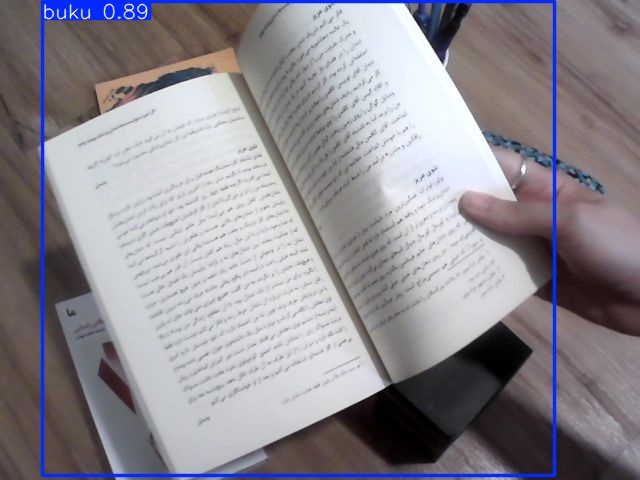


0: 480x640 2 bukus, 12.8ms
Speed: 1.7ms preprocess, 12.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


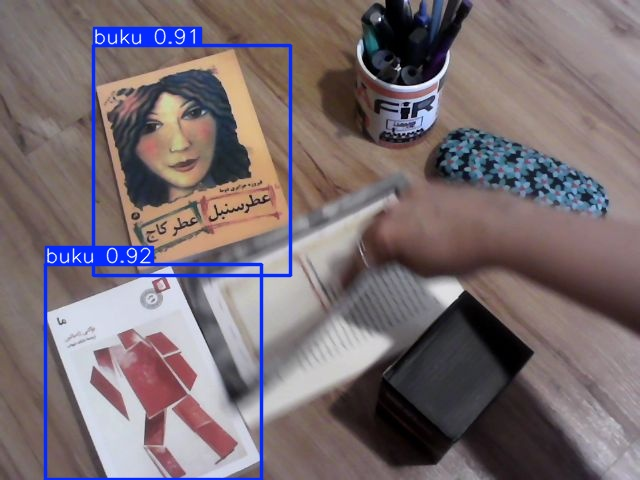


0: 480x640 3 bukus, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


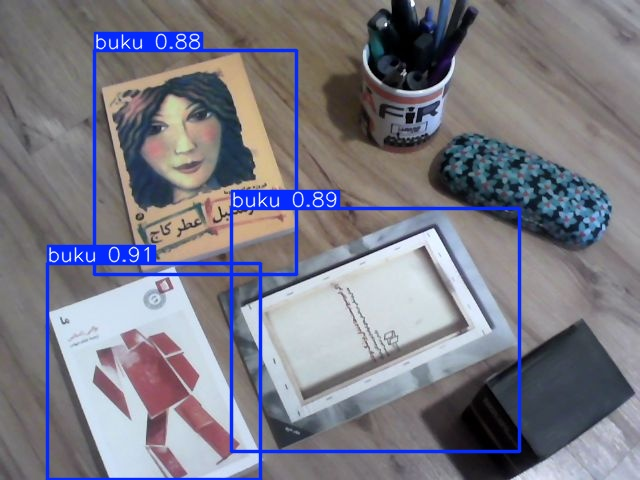


0: 480x640 4 bukus, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


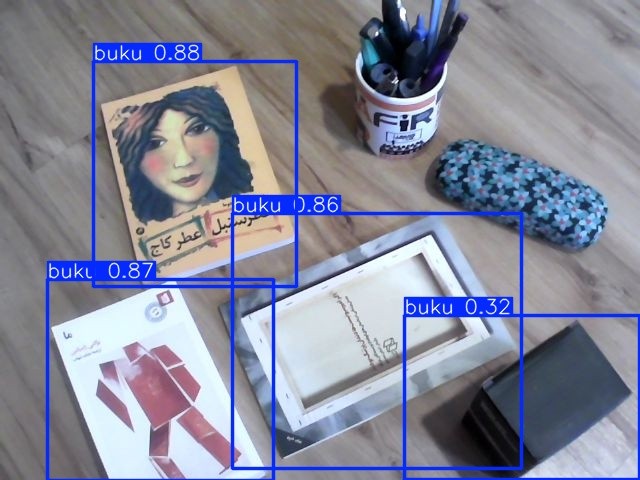


0: 480x640 3 bukus, 9.6ms
Speed: 1.6ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


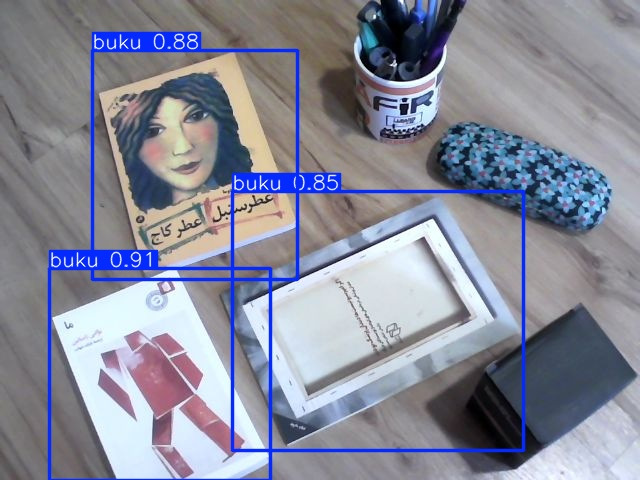


0: 480x640 3 bukus, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


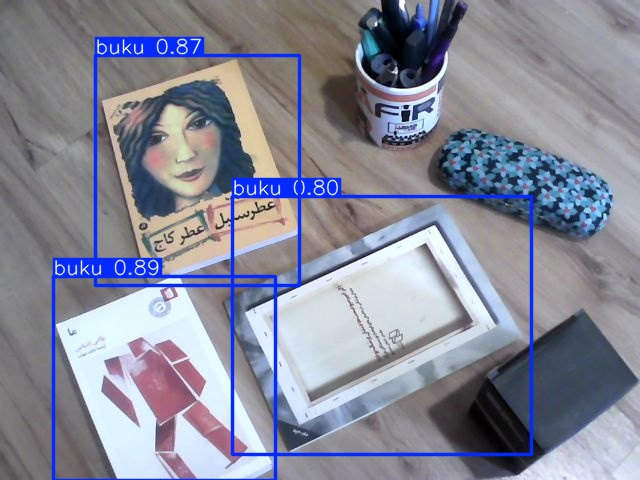

KeyboardInterrupt: 

In [11]:
# JavaScript code embedded in Python to handle video streaming and image capture
def video_stream():
    js = Javascript('''
        // initialization of variables and elements for video streaming and image capture
        var video;
        var div = null;
        var stream;
        var captureCanvas;
        var imgElement;
        var labelElement;

        var pendingResolve = null;
        var shutdown = false;

        // function to remove DOM elements and stop video stream
        function removeDom() {
            stream.getVideoTracks()[0].stop();  // Stop the video stream
            video.remove();  // Remove the video element from DOM
            div.remove();   // Remove the div container from DOM
            video = null;   // Clean up variables
            div = null;
            stream = null;
            imgElement = null;
            captureCanvas = null;
            labelElement = null;
        }

        // function to handle animation frame updates
        function onAnimationFrame() {
            if (!shutdown) {
                window.requestAnimationFrame(onAnimationFrame);  // request next animation frame
            }
            if (pendingResolve) {
                var result = "";
                if (!shutdown) {
                    captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);  // capture frame from video stream
                    result = captureCanvas.toDataURL('image/jpeg', 0.8);  // convert captured frame to JPEG format
                }
                var lp = pendingResolve;
                pendingResolve = null;
                lp(result);  // resolve promise with captured image data
            }
        }

        // asynchronous function to create DOM elements for video streaming
        async function createDom() {
            if (div !== null) {
                return stream;  // return existing stream if DOM elements already created
            }

            // create a div container for video and image elements
            div = document.createElement('div');
            div.style.border = '2px solid black';
            div.style.padding = '3px';
            div.style.width = '100%';
            div.style.maxWidth = '600px';
            document.body.appendChild(div);  // append div to the document body

            // display status information
            const modelOut = document.createElement('div');
            modelOut.innerHTML = "<span>Status:</span>";
            labelElement = document.createElement('span');
            labelElement.innerText = 'No data';
            labelElement.style.fontWeight = 'bold';
            modelOut.appendChild(labelElement);
            div.appendChild(modelOut);

            // create video element for displaying the stream
            video = document.createElement('video');
            video.style.display = 'block';
            video.width = div.clientWidth - 6;
            video.setAttribute('playsinline', '');  // allow inline playback on iOS
            video.onclick = () => { shutdown = true; };  // stop streaming when video is clicked
            stream = await navigator.mediaDevices.getUserMedia(
                {video: { facingMode: "environment"}});  // request user's camera stream
            div.appendChild(video);  // append video element to the div container

            // create image element for displaying captured frames
            imgElement = document.createElement('img');
            imgElement.style.position = 'absolute';
            imgElement.style.zIndex = 1;
            imgElement.onclick = () => { shutdown = true; };  // stop streaming when image is clicked
            div.appendChild(imgElement);  // append image element to the div container

            // display instruction to stop streaming
            const instruction = document.createElement('div');
            instruction.innerHTML =
                '<span style="color: red; font-weight: bold;">' +
                'When finished, click here or on the video to stop this demo</span>';
            div.appendChild(instruction);
            instruction.onclick = () => { shutdown = true; };  // stop streaming when instruction is clicked

            video.srcObject = stream;  // set the video stream as the source for the video element
            await video.play();  // start playing the video stream

            // create a canvas for capturing frames
            captureCanvas = document.createElement('canvas');
            captureCanvas.width = 640;
            captureCanvas.height = 480;
            window.requestAnimationFrame(onAnimationFrame);  // start animation frame updates

            return stream;  // return the created stream
        }

        // asynchronous function to stream a frame with label and image data
        async function stream_frame(label, imgData) {
            if (shutdown) {
                removeDom();  // remove DOM elements if shutdown is requested
                shutdown = false;  // reset shutdown flag
                return '';  // return empty string
            }

            var preCreate = Date.now();  // record start time for creating DOM
            stream = await createDom();  // create DOM elements for video streaming

            var preShow = Date.now();  // record start time for showing label and image
            if (label != "") {
                labelElement.innerHTML = label;  // display label in the status area
            }

            if (imgData != "") {
                var videoRect = video.getClientRects()[0];  // get position and size of video element
                imgElement.style.top = videoRect.top + "px";  // set image position relative to video
                imgElement.style.left = videoRect.left + "px";
                imgElement.style.width = videoRect.width + "px";
                imgElement.style.height = videoRect.height + "px";
                imgElement.src = imgData;  // display captured image data
            }

            var preCapture = Date.now();  // record start time for capturing frame
            var result = await new Promise(function(resolve, reject) {
                pendingResolve = resolve;  // create promise for resolving with captured image data
            });
            shutdown = false;  // reset shutdown flag

            // return timing information and captured image data
            return {'create': preShow - preCreate,
                    'show': preCapture - preShow,
                    'capture': Date.now() - preCapture,
                    'img': result};
        }
    ''')

    display(js)

# function to convert base64-encoded JavaScript reply to OpenCV image
def js_to_image(js_reply):
    image_bytes = b64decode(js_reply.split(',')[1])  # Extract base64 image data
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)  # Convert to numpy array
    img = cv2.imdecode(jpg_as_np, flags=1)  # Decode image using OpenCV
    return img

# function to request streaming a frame with label and bounding box data
def video_frame(label, bbox):
    data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))  # Execute JavaScript to stream frame
    return data


video_stream()  # call function to initialize video streaming

# initialize label and bounding box variables for video frame processing loop
label_html = 'Capture'
bbox = ''

# continuous loop to process video frames and display annotated frames
while True:
    js_reply = video_frame(label_html, bbox)  # Stream a frame with label and bounding box
    if not js_reply:
        break  # break the loop if no JavaScript reply received

    img = js_to_image(js_reply["img"])  # convert JavaScript reply to OpenCV image

    results = model.predict(source=img)  # perform prediction on the captured frame
    annotated_frame = results[0].plot()  # plot annotated frame with detections

    _, im_arr = cv2.imencode('.jpg', annotated_frame)  # encode annotated frame to JPEG format
    im_bytes = im_arr.tobytes()  # convert encoded frame to bytes
    display(Image(data=im_bytes))  # display the annotated frame as an image
